In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline

/Users/xpgeng/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def f(x):
    return 1/(1+np.exp(-x))

In [3]:
x = np.linspace(-5,5,1000)

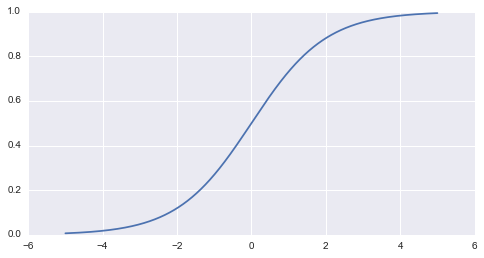

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x,f(x))

In [5]:
df = pd.DataFrame({'Density':[0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481,
                              0.437, 0.666, 0.243, 0.245, 0.343, 0.639, 0.657, 0.360, 0.593, 0.719],
                   'Sugar_content':[0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211,
                                   0.091, 0.267, 0.057, 0.099, 0.161, 0.198, 0.370, 0.042, 0.103],
                   'Good_melon':[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0., 0., 0. , 0., 0., 0., 0., 0., 0.]})

In [6]:
df

,Density,Good_melon,Sugar_content
0,0.697,1.0,0.460
1,0.774,1.0,0.376
2,0.634,1.0,0.264
3,0.608,1.0,0.318
4,0.556,1.0,0.215
5,0.403,1.0,0.237
6,0.481,1.0,0.149
7,0.437,1.0,0.211
8,0.666,0.0,0.091
9,0.243,0.0,0.267


In [7]:
df.to_csv('watermelon_data.csv')

In [8]:
X = df.loc[:, ['Density', 'Sugar_content']]

In [9]:
X['Constant'] = 1.0

In [12]:
X

,Density,Sugar_content,Constant
0,0.697,0.460,1.0
1,0.774,0.376,1.0
2,0.634,0.264,1.0
3,0.608,0.318,1.0
4,0.556,0.215,1.0
5,0.403,0.237,1.0
6,0.481,0.149,1.0
7,0.437,0.211,1.0
8,0.666,0.091,1.0
9,0.243,0.267,1.0


In [10]:
y = df.loc[:, 'Good_melon'].values

In [11]:
def cost_f(omiga, X, y):
    m = float(len(y))
    return np.sum((1/(1+np.exp(-np.dot(X, omiga)))-y)**2/(2*m))

In [13]:
def grad(omiga, X, y):
    m = float(len(y))
    return (1/(1+np.exp(-np.dot(X, omiga)))-y).dot(X)

In [15]:
omiga0 = [1.0, 1.0, 1.0]

In [24]:
alpha = 0.1

In [25]:
epsilon = 1e-3

In [29]:
iteration = 100

In [30]:
for i in range(iteration):
    omiga0 += -alpha*grad(omiga0, X, y)
    print omiga0, abs(grad(omiga0, X, y)).sum() 
    if abs(grad(omiga0, X, y)).sum() < epsilon:
        print omiga0
        break

[ 1.57649636  4.66610344 -1.93134933] 0.384398904196
[ 1.58250915  4.69012594 -1.93975393] 0.382392395708
[ 1.58847521  4.71404326 -1.9481098 ] 0.380402175198
[ 1.59439504  4.73785606 -1.95641738] 0.378428071007
[ 1.60026916  4.76156503 -1.9646771 ] 0.376469913488
[ 1.60609807  4.78517082 -1.97288939] 0.374527534979
[ 1.61188227  4.8086741  -1.98105467] 0.372600769785
[ 1.61762224  4.83207552 -1.98917335] 0.370689454153
[ 1.62331848  4.85537573 -1.99724584] 0.368793426256
[ 1.62897147  4.87857537 -2.00527256] 0.366912526166
[ 1.63458167  4.90167508 -2.0132539 ] 0.365046595839
[ 1.64014956  4.92467548 -2.02119027] 0.363195479089
[ 1.64567559  4.94757721 -2.02908205] 0.36135902157
[ 1.65116023  4.97038089 -2.03692963] 0.359537070754
[ 1.65660392  4.99308713 -2.04473341] 0.357729475912
[ 1.6620071   5.01569654 -2.05249377] 0.35593608809
[ 1.66737022  5.03820973 -2.06021107] 0.354156760094
[ 1.67269371  5.0606273  -2.06788569] 0.352391346464
[ 1.677978    5.08294983 -2.075518  ] 0.35063970

In [184]:
abs(grad(omiga0, X, y)).sum()

3.3161194177398325

In [185]:
grad(omiga0, X, y)

array([-1.05934048, -0.56256778, -1.69421115])

In [119]:
omiga0

array([ nan,  nan,  nan])

In [120]:
abs(grad(omiga0, X, y)).sum()

nan

array([-0., -0., -0.])